## Load the Data

The data is downloaded from Kaggle Titanic Competition. The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set is used to build the machine learning models. 
The test set is used to see how well the model performs on unseen data.

### Import libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import random as rnd
import seaborn as sns
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer

### Load dataset into Pandas

In [85]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full_data = [train, test]
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA 

In [86]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [87]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jensen, Mr. Hans Peder",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Feature correlation analysis

#### Pivoting features 

#### 1. Sex

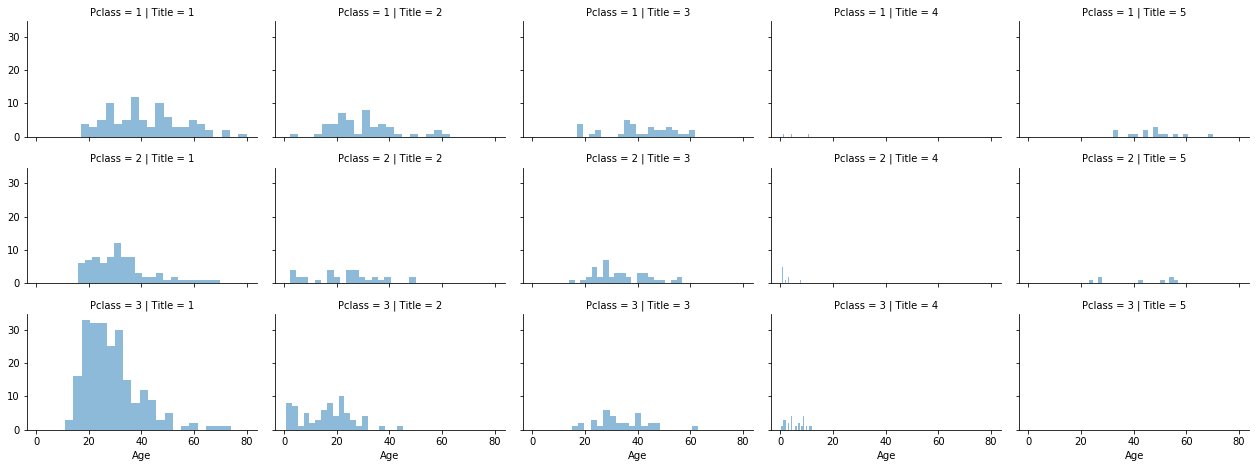

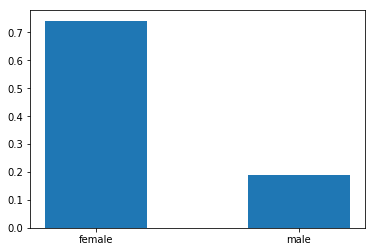

In [89]:
df = train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()
heights = df["Survived"]
position =arange(2) + 1
tick_positions = range(1,3)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Sex"].values)
plt.show()

Based on graph, theree is a obvious correlation between sex and survive.

#### 2.  Class

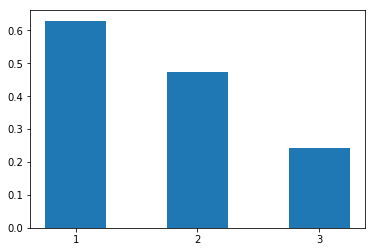

In [90]:
df = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
heights = df["Survived"]
position =arange(3) + 1
tick_positions = range(1,4)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Pclass"].values)
plt.show()

Based on graph, there is a obvious correlation between class and survive.

#### 3. Embarked

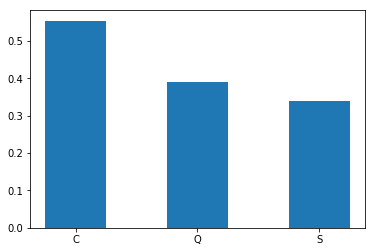

In [91]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
df = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
heights=df["Survived"]
position =arange(3) + 1
tick_positions = range(1,4)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Embarked"].values)
plt.show()


Based on graph, there might be correlation between embarked and survive.

#### Correlating numerical features

#### 1.Age 

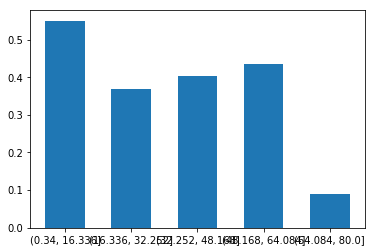

In [92]:
train['Age_group'] = pd.cut(train['Age'], 5)
df = train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean()
heights=df["Survived"]
position =arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Age_group"].values)
plt.show()

Based on graph, there is a obvious correlation between age group and survive.

#### 2.SibSp and Parch 

In [93]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


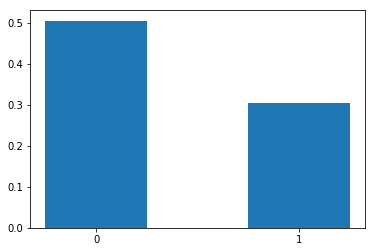

In [94]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
df = train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
heights = df["Survived"]
position =arange(2) + 1
tick_positions = range(1,3)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["IsAlone"].values)
plt.show()

Based on graph, there is a obvious correlation between IsAlone and survive.

### Prepare data 

In [95]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x=="female" else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x=="female" else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]",1,1


In [96]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.336, 32.252]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(32.252, 48.168]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.336, 32.252]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(32.252, 48.168]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(32.252, 48.168]",1,1


In [97]:
for dataset in full_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [98]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in full_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(16.336, 32.252]",2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(32.252, 48.168]",2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.336, 32.252]",1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(32.252, 48.168]",2,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(32.252, 48.168]",1,1,1


### Completing missing value 

In [99]:
grid = sns.FacetGrid(train, row='Pclass', col='Title', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)


In [100]:

for dataset in full_data:
    dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean() )

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 45.8+ KB


In [101]:
for dataset in full_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
test.head()    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,7.0000,NaN,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,NaN,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,0,3,0,3


### Data cleaning 

In [102]:
drop_feature = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch','Fare', 'Age_group']
train = train.drop(drop_feature, axis =1)    

In [103]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone,Title
0,0,3,0,1.0,0,2,0,1
1,1,1,1,2.0,1,2,0,3
2,1,3,1,1.0,0,1,1,2
3,1,1,1,2.0,0,2,0,3
4,0,3,0,2.0,0,1,1,1


In [107]:
drop_feature = ['Name', 'Ticket', 'Cabin', 'SibSp','Parch','Fare']
test = test.drop(drop_feature, axis =1)  
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,FamilySize,IsAlone,Title
0,892,3,0,2.0,2,1,1,1
1,893,3,1,2.0,0,2,0,3
2,894,2,0,3.0,2,1,1,1
3,895,3,0,1.0,0,1,1,1
4,896,3,1,1.0,0,3,0,3


In [108]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_train.head()
X_test.head()

,Pclass,Sex,Age,Embarked,FamilySize,IsAlone,Title
0,3,0,2.0,2,1,1,1
1,3,1,2.0,0,2,0,3
2,2,0,3.0,2,1,1,1
3,3,0,1.0,0,1,1,1
4,3,1,1.0,0,3,0,3


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Embarked       418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null int64
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


## Build ML models

### Logistic Regression 

In [110]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.930000000000007

In [111]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.183015
6,Title,0.490261
3,Embarked,0.221900
4,FamilySize,-0.362802
5,IsAlone,-0.496524
2,Age,-0.511873
0,Pclass,-0.999834


### Random Forest 

In [112]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.200000000000003

### Decision Tree 

In [113]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.200000000000003

### Prediction on test data 

In [114]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)